# k-prototypes


In [3]:
!pip install kmodes

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)


In [4]:
!pip install plotnine

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 38.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 38.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 26.7 MB/s eta 0:00:0000:0100:01
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.2 MB/s eta 0:00:00
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling p

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from kmodes.kprototypes import KPrototypes
import constants 
import pandas as pd
import plotnine 
from plotnine import *
import seaborn as sns

In [6]:
# Load Metadata 
metadata = constants.load_training_metadata()

# Explore metadata 
metadata

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male
...,...,...,...,...,...
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female


In [7]:
# Data cleanup 

# 1. drop N/A
print("Age N/As count: " + str(metadata['age_approx'].isna().sum()))
print("Sex N/As count: " + str(metadata['sex'].isna().sum()))

metadata.dropna(inplace=True)

# 2. Save Y 
Y = metadata.image 

# 3. Drop columns 
metadata = metadata.drop(columns=['image', 'lesion_id'])

# 4. Rename age_approx -> Age 
metadata = metadata.rename(columns={"age_approx": "age", "anatom_site_general":"site"})
metadata

Age N/As count: 437
Sex N/As count: 384


,age,site,sex
1459,50.0,posterior torso,female
1460,30.0,lower extremity,female
1461,35.0,upper extremity,female
1462,45.0,posterior torso,male
1463,20.0,upper extremity,female
...,...,...,...
25326,85.0,head/neck,female
25327,65.0,anterior torso,male
25328,70.0,lower extremity,male
25329,55.0,palms/soles,female


In [10]:
# Expirment with 8 clusters 
df = metadata
categorical_features_idx = [1, 2]
df_array = df.to_numpy()
names = df.columns

# kproto = KPrototypes(n_clusters=8, verbose=2, max_iter=20)
# clusters = kproto.fit(df_array, categorical=categorical_features_idx)
# print (clusters.cluster_centroids_.shape)
# print (clusters.cluster_centroids_)

In [ ]:
def ApplyKPrototypes (n_clusters, df = df):
    
    print ("Number of Clusters: %d" % (n_clusters))    
    categorical_features_idx = [1, 2]
    df_array = df.to_numpy()
    names = df.columns

    kproto = KPrototypes(n_clusters=n_clusters, verbose=0, max_iter=20)
    clusters = kproto.fit(df_array, categorical=categorical_features_idx)

    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=False, figsize = (16, 4))
    for ii in np.arange (0, df.shape[1]):
        ax = axes[ii]
        ax.hist(df_array[:,ii], bins=30) ## We have 150 values for each feature; bins = 30 means we have 5 points per bin
        ax.scatter (x = clusters.cluster_centroids_[:,ii], y = np.zeros(n_clusters), c = 'red', s = 100)
        ax.set_title(names[ii])

    plt.show()

    print (clusters.cluster_centroids_)

    return clusters

for nn in [1,2, 3, 5]:
   # clusters = ApplyKPrototypes(nn)

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
9


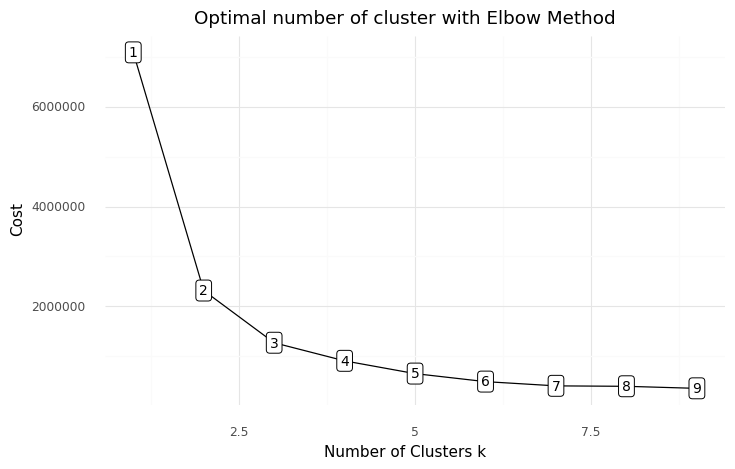

<ggplot: (8770117234261)>

In [12]:
# Choose optimal K using Elbow method
cost = []
limit = 10
for n_clusters in range(1, limit):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = n_clusters, init = 'Huang', random_state = 0)
        kprototype.fit_predict(df_array, categorical = categorical_features_idx)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(n_clusters))
    except Exception as e:
        print(e)
        break
print(len(cost))
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster':range(1, limit), 'Cost':cost})
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

## K = 3

In [11]:
# running with 3 clusters 
kproto = KPrototypes(n_clusters=3, verbose=0, max_iter=20)
clusters = kproto.fit(df, categorical=categorical_features_idx)
print (clusters.cluster_centroids_)

[['73.92678347934918' 'head/neck' 'male']
 ['32.01008249312557' 'anterior torso' 'female']
 ['52.05949656750572' 'anterior torso' 'female']]


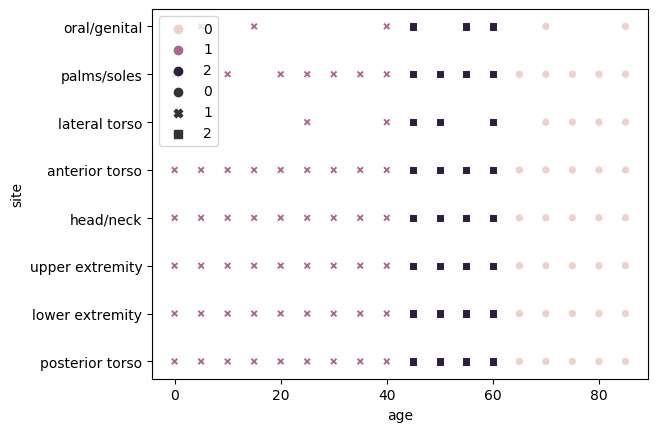

In [12]:
# Plotting k = 3
sns.scatterplot(data=df, x="age", y="site", hue=clusters.labels_, style=clusters.labels_)

## K = 4

In [13]:
# running with 3 clusters 
kproto = KPrototypes(n_clusters=4, verbose=0, max_iter=20)
clusters = kproto.fit(df, categorical=categorical_features_idx)
print (clusters.cluster_centroids_)

[['27.876216968011125' 'anterior torso' 'female']
 ['76.60510901399284' 'head/neck' 'male']
 ['59.971705001825484' 'anterior torso' 'male']
 ['45.17974392646093' 'anterior torso' 'female']]


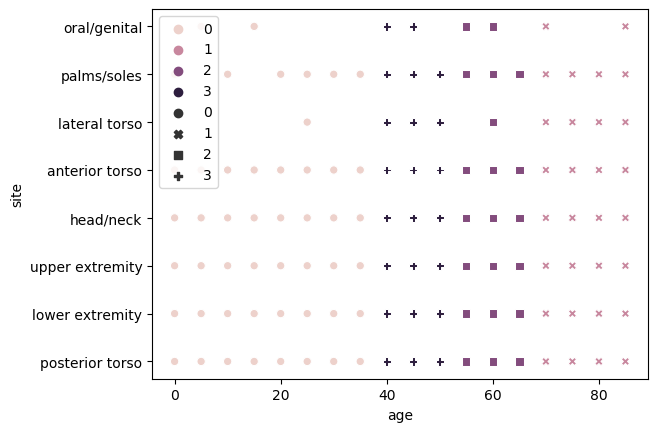

In [14]:
# Plotting K = 4
sns.scatterplot(data=df, x="age", y="site", hue=clusters.labels_, style=clusters.labels_)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=clusters, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=15),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)